참고 : 
* https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb
* https://archive.is/fY0FO

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:


* 레이블	클래스
```
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

### 데이터 탐색

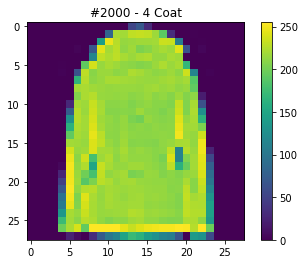

In [5]:
plt.figure()
idx_to_draw = 2000 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

### Data 전처리

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

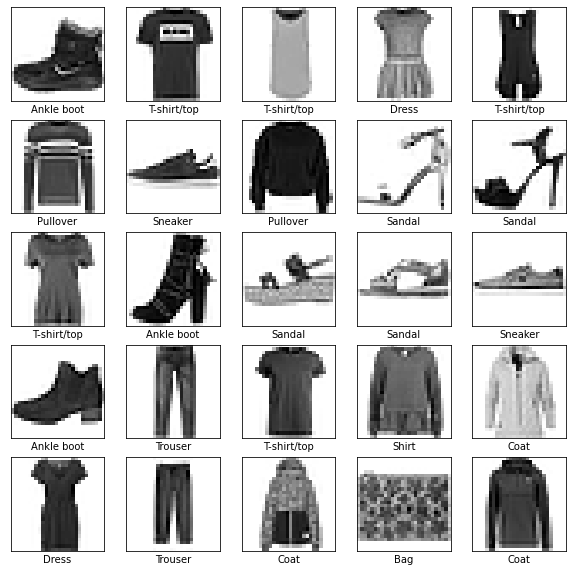

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### TDDO: 학습 코드를 위의 참조 url 을 이용하여 완성해보세요

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, batch_size=600, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.9195 - accuracy: 0.6791
Epoch 2/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4992 - accuracy: 0.8281
Epoch 3/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4283 - accuracy: 0.8498
Epoch 4/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3934 - accuracy: 0.8614
Epoch 5/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3691 - accuracy: 0.8688
Epoch 6/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3475 - accuracy: 0.8761
Epoch 7/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3313 - accuracy: 0.8808s - loss: 0.3292 - ac
Epoch 8/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3183 - accuracy: 0.8863
Epoch 9/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3031 - a

60000/60000 [==============================] - 2s 36us/sample - loss: 0.1161 - accuracy: 0.9567
Epoch 76/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1111 - accuracy: 0.9591
Epoch 77/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1106 - accuracy: 0.9580
Epoch 78/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1024 - accuracy: 0.9624
Epoch 79/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1047 - accuracy: 0.9610
Epoch 80/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1070 - accuracy: 0.9599s - loss: 0.1072 - accuracy: 0.95
Epoch 81/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1021 - accuracy: 0.9624
Epoch 82/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1028 - accuracy: 0.9619
Epoch 83/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1031 - accuracy: 0.9617

<Figure size 432x288 with 0 Axes>

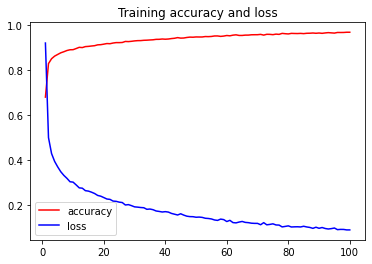

<Figure size 432x288 with 0 Axes>

In [11]:
#그래프 그리기

plt.cla()
plt.clf()

accuracy= history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'r', label = 'accuracy')
plt.plot(epochs, loss, 'b', label = 'loss')
plt.title('Training accuracy and loss')
plt.legend()
plt.figure()

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 1s - loss: 0.2268 - accuracy: 0.8964

테스트 정확도: 0.8964


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([1.3230117e-14, 6.5553968e-18, 1.3240720e-14, 3.6471007e-16,
       6.0883297e-13, 3.9302881e-07, 4.3421218e-09, 4.2936921e-07,
       3.0407933e-12, 9.9999917e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

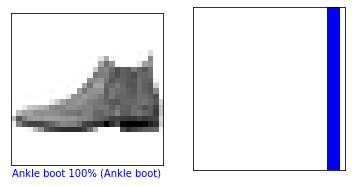

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

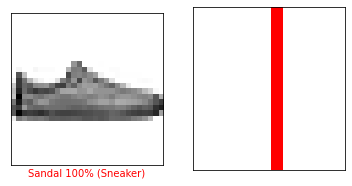

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

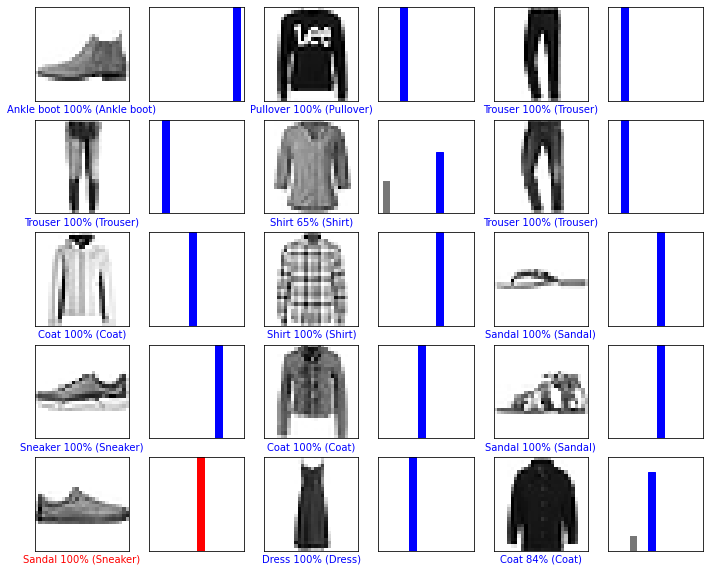

In [20]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [22]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3230091e-14 6.5553716e-18 1.3240669e-14 3.6470870e-16 6.0883297e-13
  3.9302807e-07 4.3421138e-09 4.2936838e-07 3.0407933e-12 9.9999917e-01]]


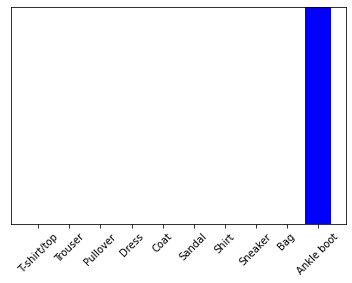

In [24]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

9